In [33]:
import pandas as pd

In [34]:
df=pd.read_csv('IRIS.csv')

In [35]:
df

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,Iris-virginica
146,6.3,2.5,5.0,1.9,Iris-virginica
147,6.5,3.0,5.2,2.0,Iris-virginica
148,6.2,3.4,5.4,2.3,Iris-virginica


In [36]:
from sklearn.preprocessing import LabelEncoder
l=LabelEncoder()

In [37]:
df['species']=l.fit_transform(df['species'])

In [38]:
import matplotlib.pyplot as plt

In [39]:
from sklearn.cluster import KMeans

In [40]:
sse=[]
for k in range(2,11):
    km=KMeans(n_clusters=k)
    km.fit(df)
    sse.append(km.inertia_)

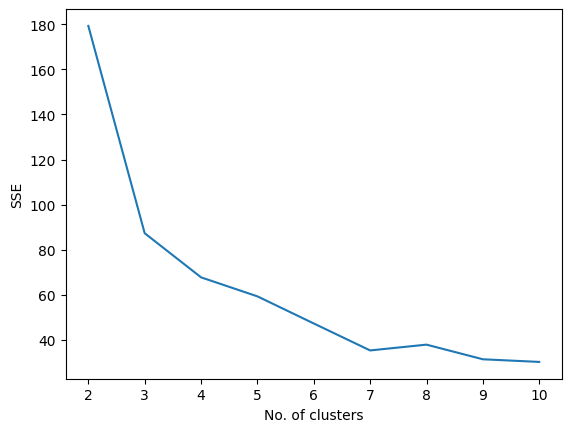

In [41]:
plt.xlabel('No. of clusters')
plt.ylabel('SSE')
plt.plot(range(2,11),sse)

In [42]:
from sklearn.preprocessing import MinMaxScaler
scaler=MinMaxScaler()

In [43]:
km_model=KMeans(n_clusters=3)
prediction=km_model.fit_predict(df)
prediction

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 2, 2, 2, 2, 2, 0, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2], dtype=int32)

In [44]:
df['Clusters']=prediction
df

,sepal_length,sepal_width,petal_length,petal_width,species,Clusters
0,5.1,3.5,1.4,0.2,0,1
1,4.9,3.0,1.4,0.2,0,1
2,4.7,3.2,1.3,0.2,0,1
3,4.6,3.1,1.5,0.2,0,1
4,5.0,3.6,1.4,0.2,0,1
...,...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,2,2
146,6.3,2.5,5.0,1.9,2,2
147,6.5,3.0,5.2,2.0,2,2
148,6.2,3.4,5.4,2.3,2,2


In [45]:
km_model.cluster_centers_

array([[5.91568627, 2.76470588, 4.26470588, 1.33333333, 1.01960784],
       [5.006     , 3.418     , 1.464     , 0.244     , 0.        ],
       [6.62244898, 2.98367347, 5.57346939, 2.03265306, 2.        ]])

In [46]:
df1=df[df['Clusters']==0]
df2=df[df['Clusters']==1]
df3=df[df['Clusters']==2]

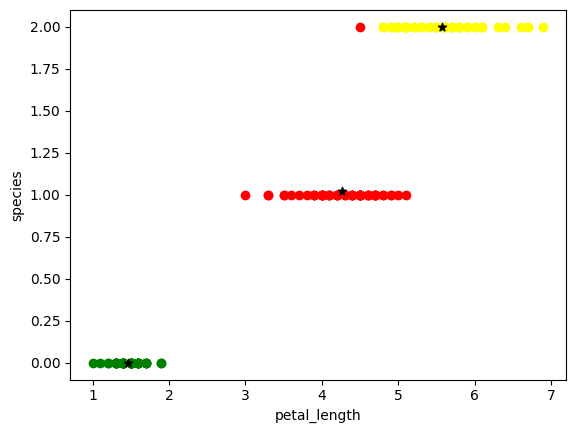

In [53]:
plt.scatter(df1['petal_length'],df1['species'],color='red')
plt.scatter(df2['petal_length'],df2['species'],color='green')
plt.scatter(df3['petal_length'],df3['species'],color='yellow')
plt.xlabel('petal_length')
plt.ylabel('species')
centers=km_model.cluster_centers_
plt.scatter(centers[:,2],centers[:,4],marker='*',color='black')

In [52]:
centers

array([[5.91568627, 2.76470588, 4.26470588, 1.33333333, 1.01960784],
       [5.006     , 3.418     , 1.464     , 0.244     , 0.        ],
       [6.62244898, 2.98367347, 5.57346939, 2.03265306, 2.        ]])